In [1]:
## Ham veri ile etiket olmadan veri içindeki kalıp-patternları arıyoruz.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y_true = make_blobs(n_samples = 300, centers=4, random_state=42, cluster_std=1.0)

In [12]:
import matplotlib.pyplot as plt

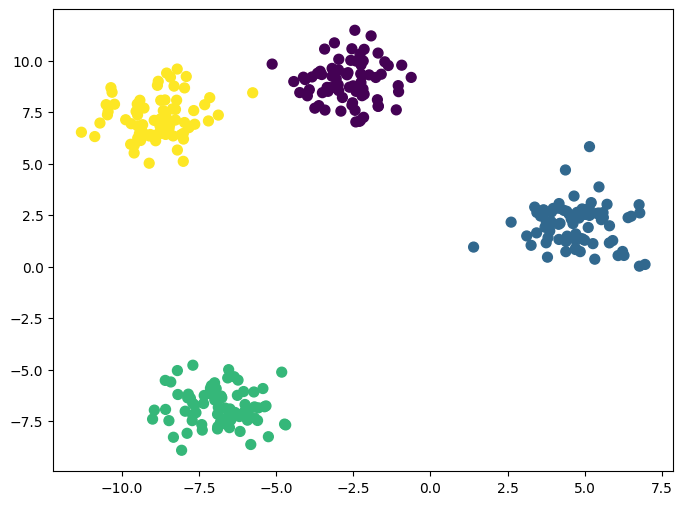

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true, s=50)

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [29]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
X = df[ [ "Annual Income (k$)", "Spending Score (1-100)" ] ].values

In [61]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [62]:
model.cluster_centers_

array([[ 78.55172414,  82.17241379],
       [ 26.30434783,  20.91304348],
       [ 48.26      ,  56.48      ],
       [ 87.        ,  18.63157895],
       [109.7       ,  82.        ]])

In [63]:
y = model.predict(X) #her veriyi belirlediği grup merkezine göre en yakın gruba atadı.
# 14:15

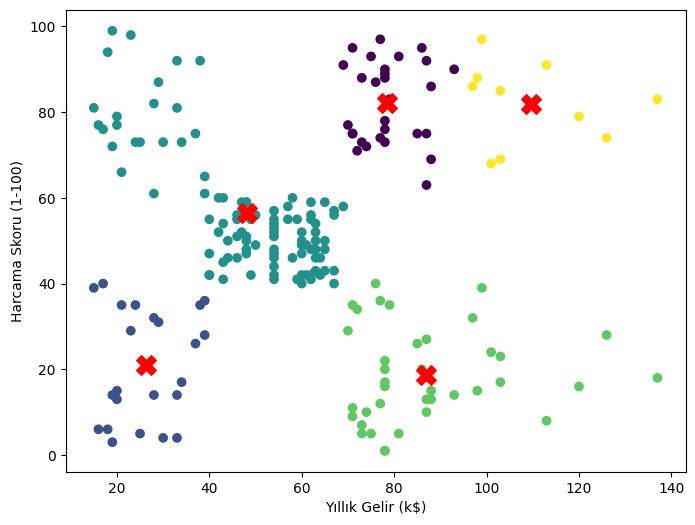

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=200, marker="X", c="red")
plt.xlabel("Yıllık Gelir (k$)")
plt.ylabel("Harcama Skoru (1-100)")
plt.show()

In [65]:
model.inertia_

66465.14810226463

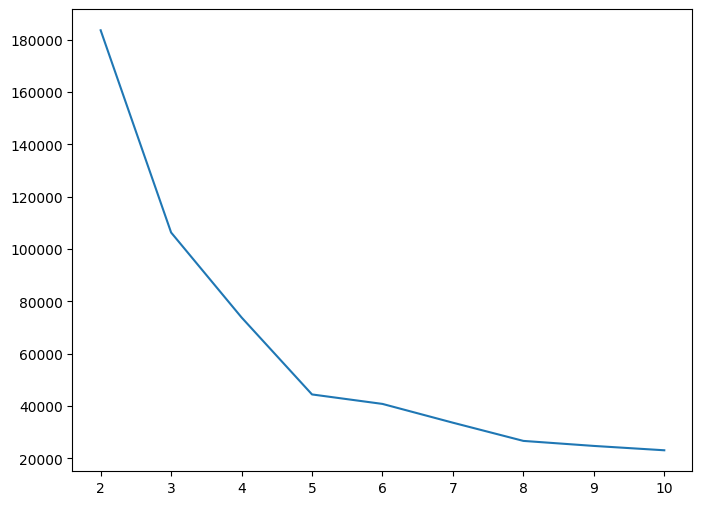

In [60]:
# inertia => Her bir noktanın kendi küme merkezine olan uzaklığının karelerinin toplamıdır.

def elbow_method():
    inertias = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), inertias)

elbow_method()